In [ ]:
# ---------------------
# Step 1: Import Libraries
# ---------------------
# Import necessary libraries: requests, BeautifulSoup, pandas, matplotlib/seaborn.

# ---------------------
# Step 2: Request Data
# ---------------------
# Make an HTTP GET request to the Wikipedia URL containing the age-wise literacy data.

# ---------------------
# Step 3: Parse the HTML
# ---------------------
# Use BeautifulSoup to parse the page.
# Locate the specific table that includes age-wise literacy rates by country.

# ---------------------
# Step 4: Extract Data from Table
# ---------------------
# For each country, extract columns such as:
# - Country Name
# - Year
# - Total Literacy Rate
# - Youth Literacy Rate
# - Adult Literacy Rate
# - Elderly Literacy Rate (if present)
# Ensure column consistency and handle missing values appropriately.

# ---------------------
# Step 5: Save Data to CSV
# ---------------------
# Store the structured data in a CSV file with proper headers.

# ---------------------
# Step 6: Load CSV for Analysis
# ---------------------
# Read the CSV using pandas and verify data integrity (data types, null values).

# ---------------------
# Step 7: Data Cleaning
# ---------------------
# Clean the data:
# - Convert percentages to numeric format.
# - Handle null or inconsistent values.
# - Filter out rows with missing 'Total Literacy Rate' or Year.

# ---------------------
# Step 8: Univariate Analysis
# ---------------------
# Analyze individual literacy metrics:
# - Distribution of total literacy rates
# - Compare youth vs adult vs elderly literacy rates globally
# - Use histograms, boxplots

# ---------------------
# Step 9: Bivariate Analysis
# ---------------------
# Explore relationships such as:
# - Youth vs Adult literacy rate (scatterplot)
# - Literacy rate vs year (line plots or trends if historical)
# - Total vs elderly literacy rate to explore generational shifts

# ---------------------
# Step 10: Grouped Analysis
# ---------------------
# Optional: Map countries to continents/regions manually or via a lookup.
# - Compare regional averages for each age group.
# - Highlight global trends by region.

# ---------------------
# Step 11: Descriptive Statistics
# ---------------------
# Calculate mean, median, std. deviation for each literacy category (youth, adult, elderly).
# Identify countries with literacy gaps between age groups.

# ---------------------
# Step 12: Define & Answer Key Questions
# ---------------------
# Use visualizations and analysis to answer:

# 1. Which countries have the highest and lowest total literacy rates?
# 2. Which countries have the largest gaps between youth and elderly literacy rates?
# 3. What is the global average youth literacy rate?
# 4. Are countries improving literacy over time? (if historical data exists)
# 5. Which countries have high youth literacy but low elderly literacy?
# 6. Are there countries with uniformly high literacy across all age groups?
# 7. What age group has the most variation in literacy across countries?

# ---------------------
# Step 13: Visualizations
# ---------------------
# Create plots:
# - Bar chart: Top 10 countries by youth literacy
# - Boxplot: Literacy rate by age group
# - Scatter plot: Youth vs Elderly literacy
# - Heatmap (optional): Literacy rates across age groups by region

# ---------------------
# Step 14: Summary of Insights
# ---------------------
# Write your interpretations based on the visualizations.
# Discuss countries doing well, those lagging behind, and age groups needing focus.

# ---------------------
# Step 15: Save Results
# ---------------------
# Save your CSV and visualizations for final submission.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


url = "https://en.m.wikipedia.org/wiki/List_of_countries_by_literacy_rate"
response = requests.get(url)
response.raise_for_status()


In [ ]:
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", class_="wikitable")
if table:
    print("Table found successfully.")
else:
    print("Table not found. Check the HTML structure and selector.")


Table found successfully.


In [ ]:
data = []
rows = table.find_all("tr")
header_row = rows[0]
headers = [header.text.strip() for header in header_row.find_all("th")]

for row in rows[1:]:
    cols = row.find_all("td")
    row_data = {}
    for i, col in enumerate(cols):
        if i < len(headers):
            header = headers[i]
            try:
                row_data[header] = col.text.strip()
            except IndexError:
                row_data[header] = None
        else:
            pass

    data.append(row_data)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.columns = df.columns.astype(str).str.replace(r'\[.*\]', '', regex=True)
df.columns = df.columns.str.strip()
df = df.rename(columns={df.columns[0]: "Country"})
df = df.rename(columns={df.columns[1]: "Year"})
df = df.rename(columns={df.columns[2]: "Youth Literacy Rate"})
df = df.rename(columns={df.columns[3]: "Adult Literacy Rate"})
df = df.rename(columns={df.columns[4]: "Total Literacy Rate"})

In [ ]:
numeric_cols = ['Year', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Total Literacy Rate']  # Remove 'Elderly Literacy Rate'
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.dropna(subset=['Total Literacy Rate'], inplace=True)
df.dropna(subset=['Year'], inplace=True)


In [ ]:
df.to_csv("literacy_rates.csv", index=False)

print(df.head())

            Country  Year  Youth Literacy Rate  Adult Literacy Rate  \
1     Afghanistan *  65.0              20204.0                 31.7   
2         Albania *  99.2               2012.0                 97.2   
3         Algeria *  93.8               2008.0                 75.1   
4  American Samoa *  97.7               1980.0                 97.3   
6          Angola *  77.4               2014.0                 66.0   

   Total Literacy Rate  
1               2011.0  
2               2012.0  
3               2008.0  
4               1980.0  
6               2014.0  


In [ ]:
selected_columns = ['Country', 'Year', 'Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate'] # Remove 'Elderly Literacy Rate'
df_selected = df[selected_columns].copy()
for col in ['Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate']: # Remove 'Elderly Literacy Rate'
    df_selected[col] = df_selected[col].replace('', float('nan'))
numeric_columns_to_fill = ['Year', 'Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate'] # Remove 'Elderly Literacy Rate'
df_selected[numeric_columns_to_fill] = df_selected[numeric_columns_to_fill].fillna(0)

print(df_selected.head())

            Country  Year  Total Literacy Rate  Youth Literacy Rate  \
1     Afghanistan *  65.0               2011.0              20204.0   
2         Albania *  99.2               2012.0               2012.0   
3         Algeria *  93.8               2008.0               2008.0   
4  American Samoa *  97.7               1980.0               1980.0   
6          Angola *  77.4               2014.0               2014.0   

   Adult Literacy Rate  
1                 31.7  
2                 97.2  
3                 75.1  
4                 97.3  
6                 66.0  


In [ ]:

df = pd.read_csv("literacy_rates.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              168 non-null    object 
 1   Year                 168 non-null    float64
 2   Youth Literacy Rate  168 non-null    float64
 3   Adult Literacy Rate  168 non-null    float64
 4   Total Literacy Rate  168 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.7+ KB
None
              Year  Youth Literacy Rate  Adult Literacy Rate  \
count   168.000000           168.000000           168.000000   
mean    148.519881          2119.029762           140.176488   
std     757.862509          1403.662900           743.098948   
min      30.800000          1970.000000            22.300000   
25%      86.575000          2010.000000            75.000000   
50%      98.100000          2012.000000            92.700000   
75%      99.400000          2015.000000  

In [ ]:
for col in ['Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate']:  # Only process existing columns
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in ['Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate']:  # Only process existing columns
    df[col] = df[col].fillna(df[col].mean())
df = df.dropna(subset=['Total Literacy Rate', 'Year'])
print(df.head())

            Country  Year  Youth Literacy Rate  Adult Literacy Rate  \
0     Afghanistan *  65.0              20204.0                 31.7   
1         Albania *  99.2               2012.0                 97.2   
2         Algeria *  93.8               2008.0                 75.1   
3  American Samoa *  97.7               1980.0                 97.3   
4          Angola *  77.4               2014.0                 66.0   

   Total Literacy Rate  
0               2011.0  
1               2012.0  
2               2008.0  
3               1980.0  
4               2014.0  


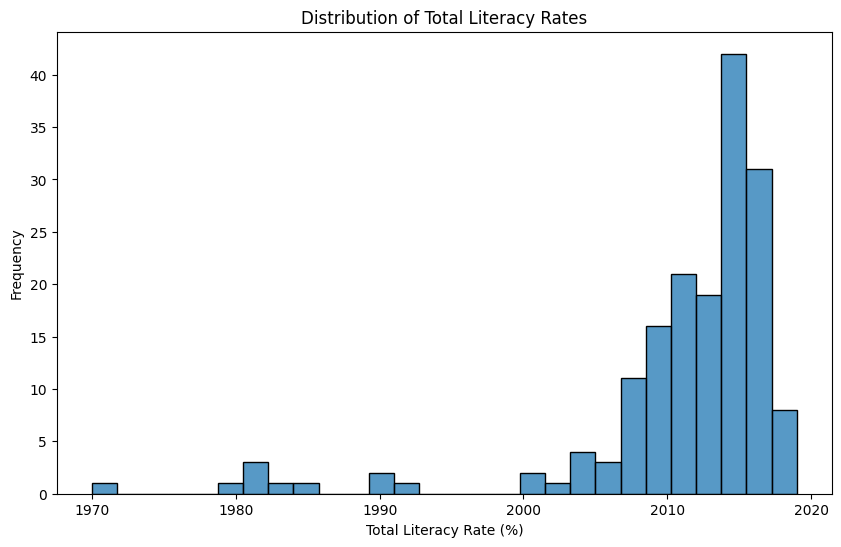

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Literacy Rate'], )
plt.title('Distribution of Total Literacy Rates')
plt.xlabel('Total Literacy Rate (%)')
plt.ylabel('Frequency')
plt.show()

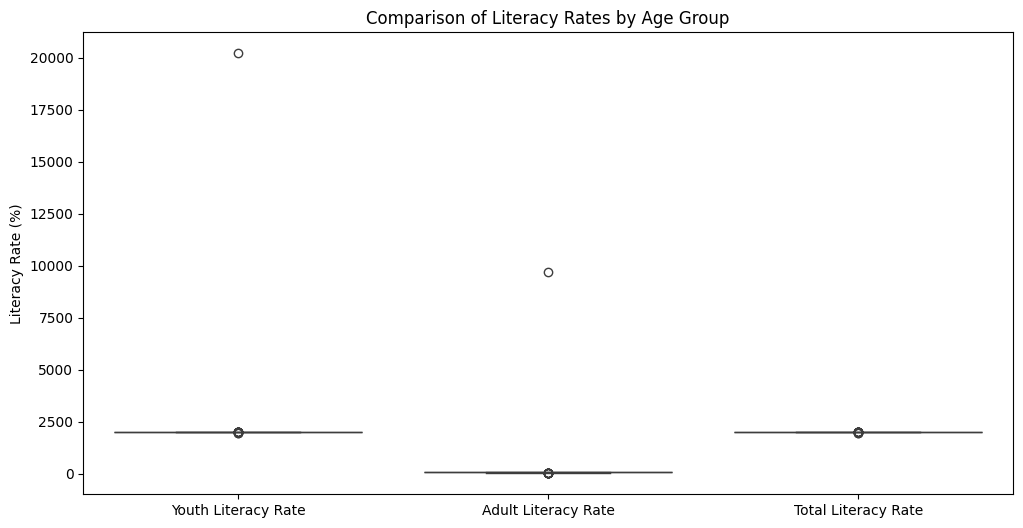

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Total Literacy Rate']]) # Replace 'Elderly Literacy Rate' with 'Total Literacy Rate' or other existing column
plt.title('Comparison of Literacy Rates by Age Group')
plt.ylabel('Literacy Rate (%)')
plt.show()

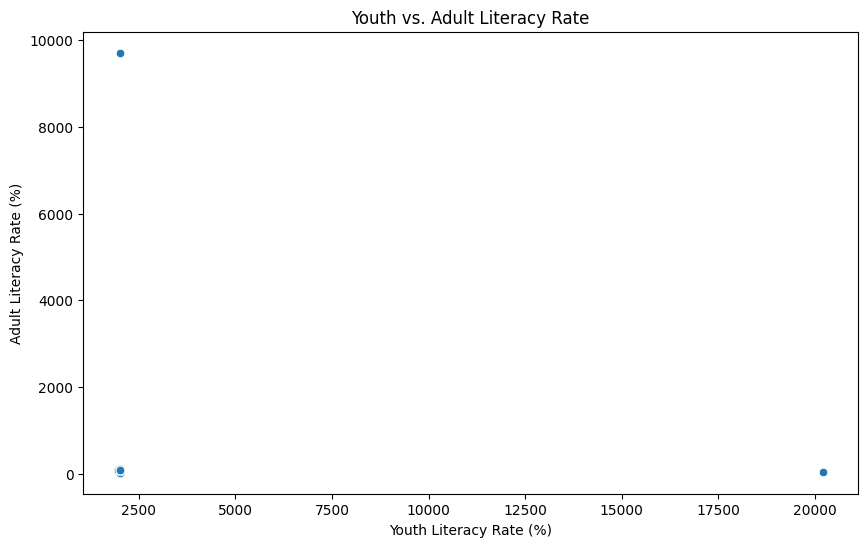

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Youth Literacy Rate', y='Adult Literacy Rate', data=df)
plt.title('Youth vs. Adult Literacy Rate')
plt.xlabel('Youth Literacy Rate (%)')
plt.ylabel('Adult Literacy Rate (%)')
plt.show()

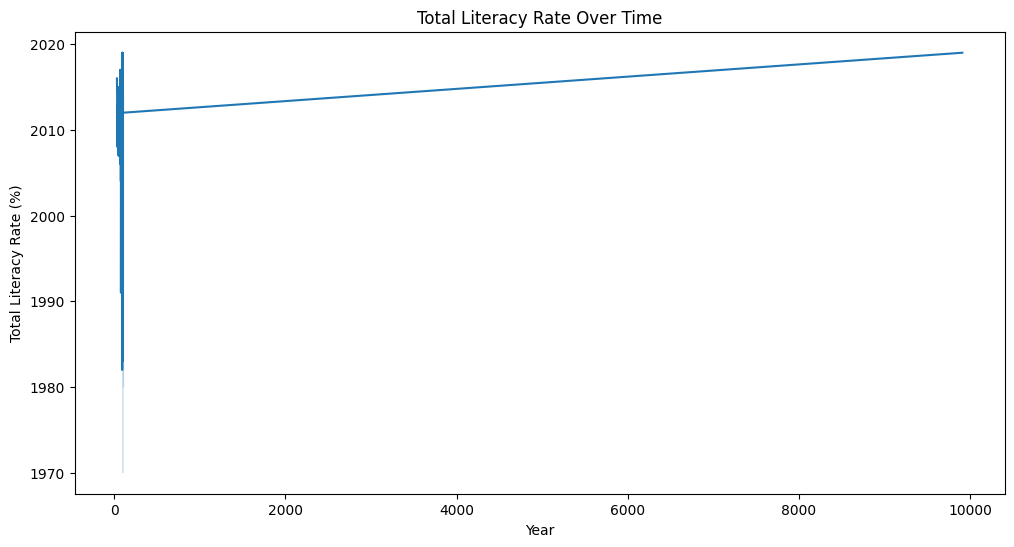

In [ ]:
if 'Year' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Total Literacy Rate', data=df)
    plt.title('Total Literacy Rate Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Literacy Rate (%)')
    plt.show()

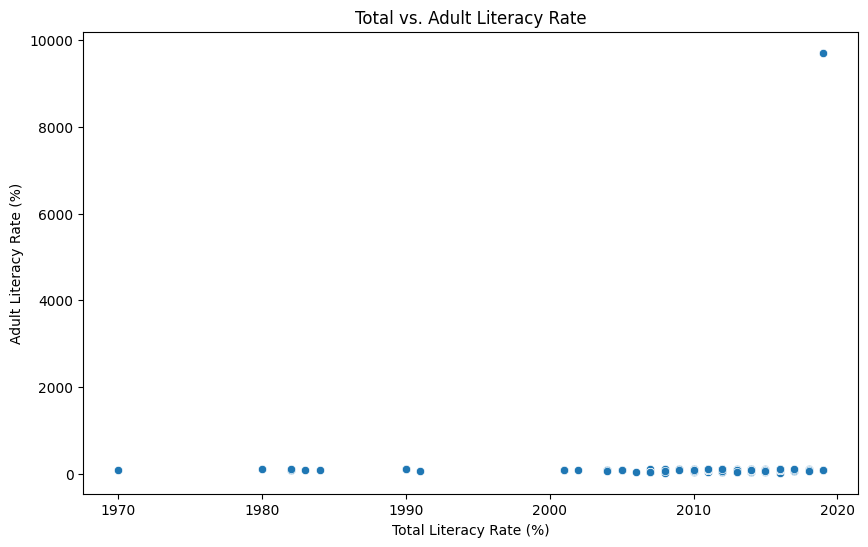

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Literacy Rate', y='Adult Literacy Rate', data=df)
plt.title('Total vs. Adult Literacy Rate') # Update the title accordingly
plt.xlabel('Total Literacy Rate (%)')
plt.ylabel('Adult Literacy Rate (%)') # Update the y-axis label accordingly
plt.show()

In [ ]:
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
}
df['Region'] = df['Country'].map(country_to_region).fillna('Unknown')
grouped_data = df.groupby(['Region', 'Year'])[['Youth Literacy Rate', 'Adult Literacy Rate', 'Total Literacy Rate']].mean()
print("\nRegional Averages for Each Age Group:")
print(grouped_data)



Regional Averages for Each Age Group:
                 Youth Literacy Rate  Adult Literacy Rate  Total Literacy Rate
Region  Year                                                                  
Unknown 30.80            2016.000000                22.30          2016.000000
        36.40            2010.000000                36.80          2010.000000
        36.70            2008.000000                26.80          2008.000000
        39.80            2012.000000                30.60          2012.000000
        46.30            2014.000000                32.00          2014.000000
...                              ...                  ...                  ...
        99.80            2011.909091                98.60          2011.909091
        99.85            2018.000000                96.86          2018.000000
        99.90            2010.500000                99.37          2010.500000
        100.00           2012.000000               100.00          2012.000000
        9911.

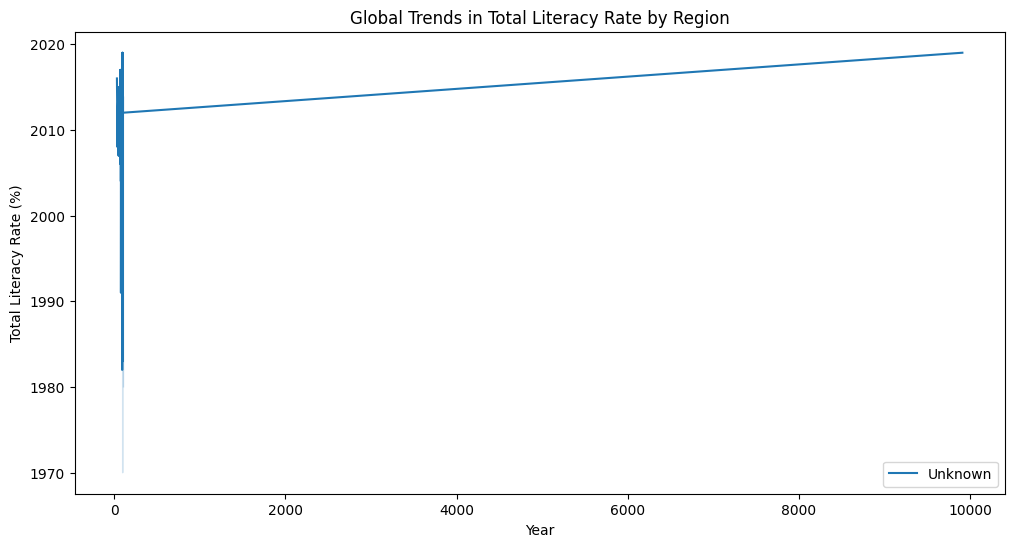

In [ ]:
plt.figure(figsize=(12, 6))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    sns.lineplot(x='Year', y='Total Literacy Rate', data=region_data, label=region)

plt.title('Global Trends in Total Literacy Rate by Region')
plt.xlabel('Year')
plt.ylabel('Total Literacy Rate (%)')
plt.legend()
plt.show()

In [33]:
descriptive_stats = df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Total Literacy Rate']].describe()  # Replace 'Elderly Literacy Rate' with an existing column like 'Total Literacy Rate'
print("\nDescriptive Statistics for Literacy Rates:")
print(descriptive_stats)


Descriptive Statistics for Literacy Rates:
       Youth Literacy Rate  Adult Literacy Rate  Total Literacy Rate
count           168.000000           168.000000           168.000000
mean           2119.029762           140.176488          2010.892857
std            1403.662900           743.098948             7.935395
min            1970.000000            22.300000          1970.000000
25%            2010.000000            75.000000          2010.000000
50%            2012.000000            92.700000          2013.000000
75%            2015.000000            97.825000          2015.000000
max           20204.000000          9711.000000          2019.000000


In [35]:
df['Literacy Gap'] = abs(df['Youth Literacy Rate'] - df['Adult Literacy Rate'])
literacy_gap_threshold = 15
countries_with_gaps = df[df['Literacy Gap'] > literacy_gap_threshold][['Country', 'Youth Literacy Rate', 'Adult Literacy Rate', 'Literacy Gap']]
print("\nCountries with Significant Literacy Gaps (Youth vs. Elderly):")
print(countries_with_gaps) # Printing the result.


Countries with Significant Literacy Gaps (Youth vs. Elderly):
              Country  Youth Literacy Rate  Adult Literacy Rate  Literacy Gap
0       Afghanistan *              20204.0                 31.7       20172.3
1           Albania *               2012.0                 97.2        1914.8
2           Algeria *               2008.0                 75.1        1932.9
3    American Samoa *               1980.0                 97.3        1882.7
4            Angola *               2014.0                 66.0        1948.0
..                ...                  ...                  ...           ...
163       Venezuela *               2016.0                 97.1        1918.9
164         Vietnam *               2009.0                 95.8        1913.2
165           Yemen *               2004.0                 54.1        1949.9
166          Zambia *               2010.0                 83.0        1927.0
167        Zimbabwe *               2014.0                 88.7        1925.3



In [36]:

highest_literacy = df.loc[df['Total Literacy Rate'].idxmax()]
lowest_literacy = df.loc[df['Total Literacy Rate'].idxmin()]

print(f"Highest Total Literacy Rate: {highest_literacy['Country']} ({highest_literacy['Total Literacy Rate']:.2f}%)")
print(f"Lowest Total Literacy Rate: {lowest_literacy['Country']} ({lowest_literacy['Total Literacy Rate']:.2f}%)")



Highest Total Literacy Rate: Bangladesh * (2019.00%)
Lowest Total Literacy Rate: Saint Vincent and the Grenadines * (1970.00%)


In [38]:
df['Literacy Gap'] = abs(df['Youth Literacy Rate'] - df['Adult Literacy Rate'])  # Replace 'Elderly Literacy Rate' with 'Adult Literacy Rate' or 'Total Literacy Rate'
largest_gap = df.loc[df['Literacy Gap'].idxmax()]
print(f"\nLargest Literacy Gap: {largest_gap['Country']} ({largest_gap['Literacy Gap']:.2f}%)")


Largest Literacy Gap: Afghanistan * (20172.30%)


In [39]:
global_avg_youth_literacy = df['Youth Literacy Rate'].mean()
print(f"\nGlobal Average Youth Literacy Rate: {global_avg_youth_literacy:.2f}%")


Global Average Youth Literacy Rate: 2119.03%


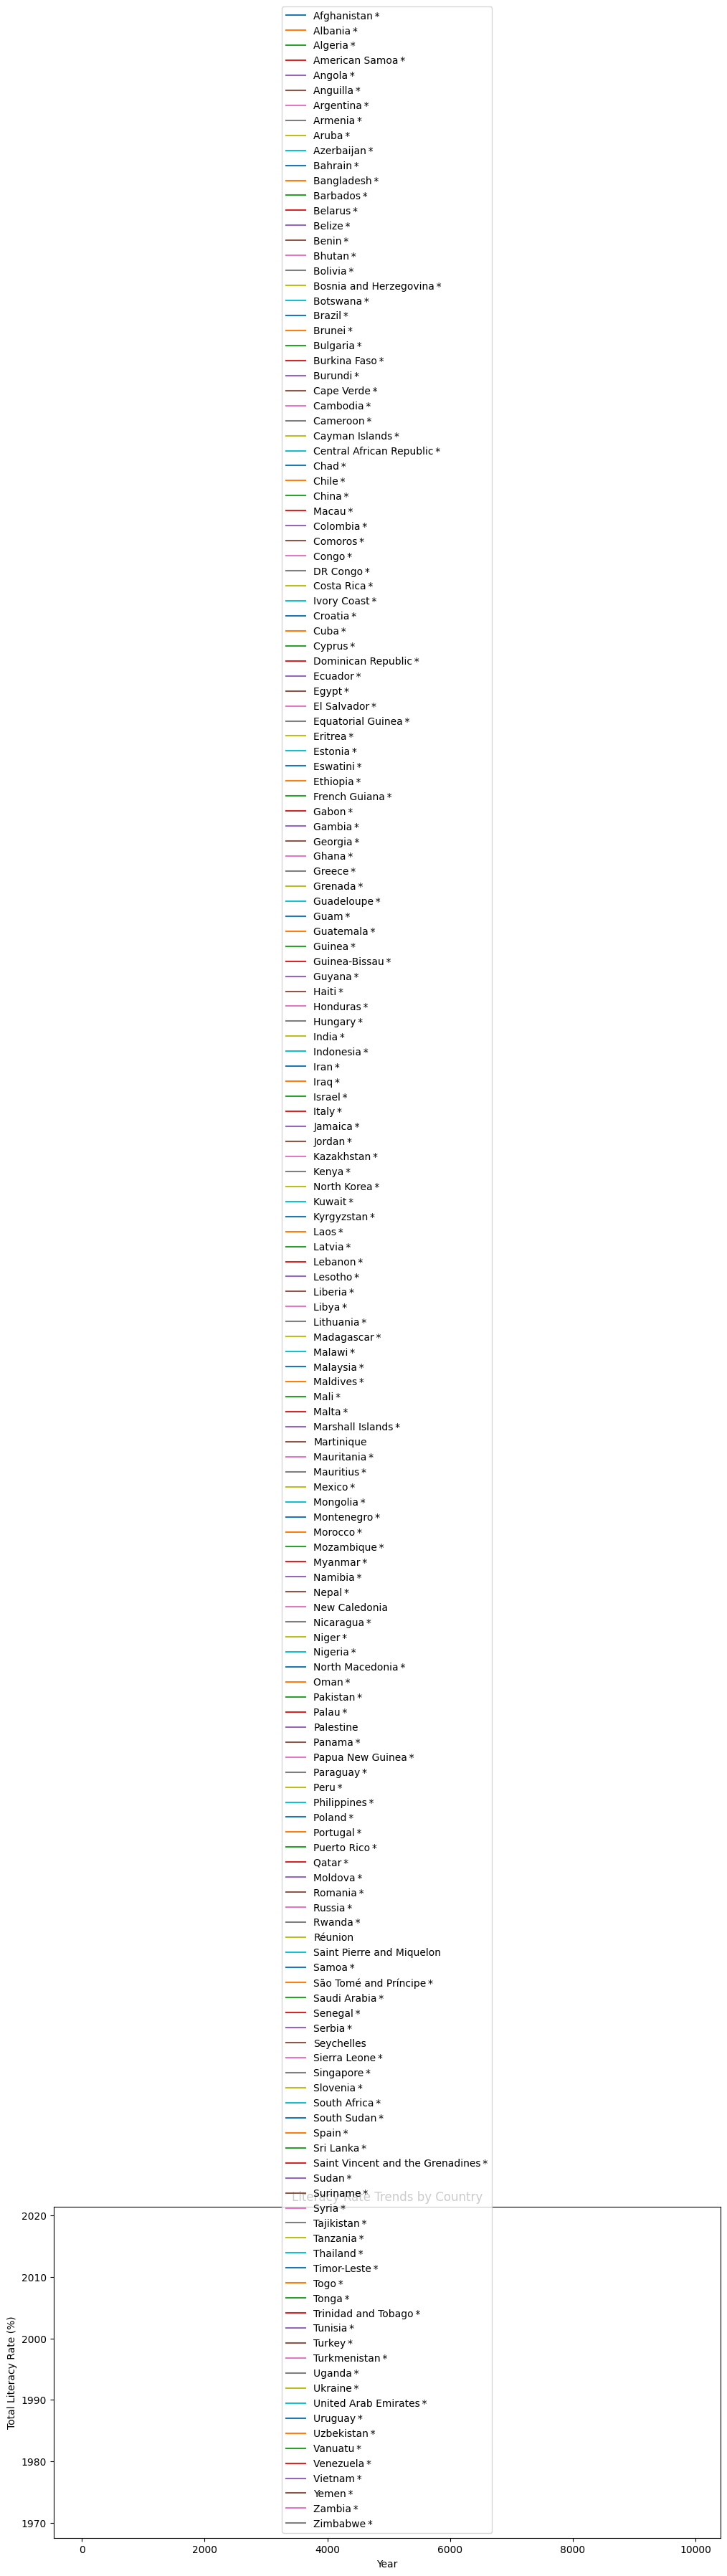

In [40]:
if 'Year' in df.columns:
    plt.figure(figsize=(12, 6))
    for country in df['Country'].unique():
      country_data = df[df['Country'] == country]
      sns.lineplot(x='Year', y='Total Literacy Rate', data=country_data, label=country)
    plt.title('Literacy Rate Trends by Country')
    plt.xlabel('Year')
    plt.ylabel('Total Literacy Rate (%)')
    plt.legend()
    plt.show()
else:
    print("Year column not found in the dataframe.")
    print("Cannot perform analysis of literacy improvement over time without year information.")


In [48]:
high_youth_low_adult = df[(df['Youth Literacy Rate'] >= 90) & (df['Adult Literacy Rate'] <= 50)]
print("\nCountries with High Youth but Low Adult Literacy:")
print(high_youth_low_adult[['Country', 'Youth Literacy Rate', 'Adult Literacy Rate']])


Countries with High Youth but Low Adult Literacy:
                        Country  Youth Literacy Rate  Adult Literacy Rate
0                 Afghanistan *              20204.0                 31.7
15                      Benin *               2012.0                 32.9
23               Burkina Faso *               2014.0                 34.6
29   Central African Republic *               2010.0                 36.8
30                       Chad *               2016.0                 22.3
35                    Comoros *               2012.0                 49.2
39                Ivory Coast *               2014.0                 43.9
51                   Ethiopia *               2007.0                 39.0
54                     Gambia *               2013.0                 42.0
62                     Guinea *               2014.0                 32.0
63              Guinea-Bissau *               2014.0                 45.6
65                      Haiti *               2006.0         

In [50]:
uniformly_high = df[(df['Total Literacy Rate'] > 95) & (df['Youth Literacy Rate'] > 95) & (df['Adult Literacy Rate'] > 95)]  # Removed 'Elderly Literacy Rate' condition
print("\nCountries with Uniformly High Literacy:")
print(uniformly_high[['Country','Total Literacy Rate', 'Youth Literacy Rate', 'Adult Literacy Rate']])  # Removed 'Elderly Literacy Rate' from the output columns


Countries with Uniformly High Literacy:
              Country  Total Literacy Rate  Youth Literacy Rate  \
1           Albania *               2012.0               2012.0   
3    American Samoa *               1980.0               1980.0   
5          Anguilla *               1984.0               1984.0   
6         Argentina *               2016.0               2016.0   
7           Armenia *               2011.0               2011.0   
..                ...                  ...                  ...   
158         Ukraine *               2012.0               2012.0   
160         Uruguay *               2017.0               2017.0   
161      Uzbekistan *               2016.0               2016.0   
163       Venezuela *               2016.0               2016.0   
164         Vietnam *               2019.0               2009.0   

     Adult Literacy Rate  
1                   97.2  
3                   97.3  
5                   95.4  
6                   99.1  
7                  

In [52]:
std_devs = df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Total Literacy Rate']].std()  # Replace 'Elderly Literacy Rate' with an existing column, like 'Total Literacy Rate'
age_group_most_variation = std_devs.idxmax()
print(f"\nAge Group with the Most Variation in Literacy: {age_group_most_variation}")


Age Group with the Most Variation in Literacy: Youth Literacy Rate


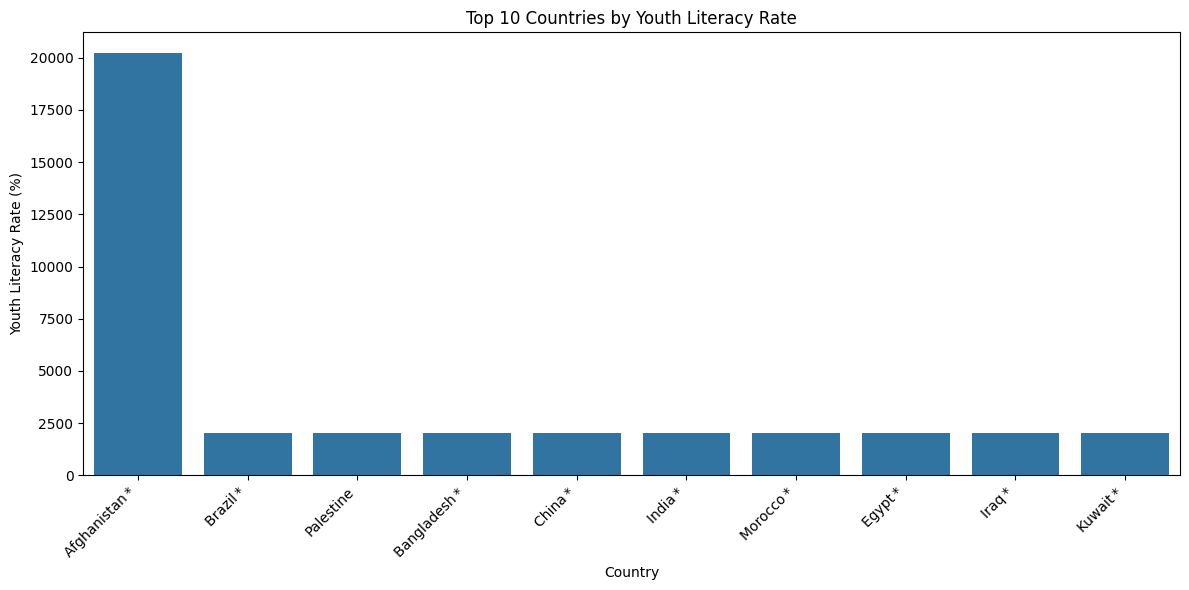

In [44]:

plt.figure(figsize=(12, 6))
top_10_youth_literacy = df.nlargest(10, 'Youth Literacy Rate')
sns.barplot(x='Country', y='Youth Literacy Rate', data=top_10_youth_literacy)
plt.title('Top 10 Countries by Youth Literacy Rate')
plt.xlabel('Country')
plt.ylabel('Youth Literacy Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



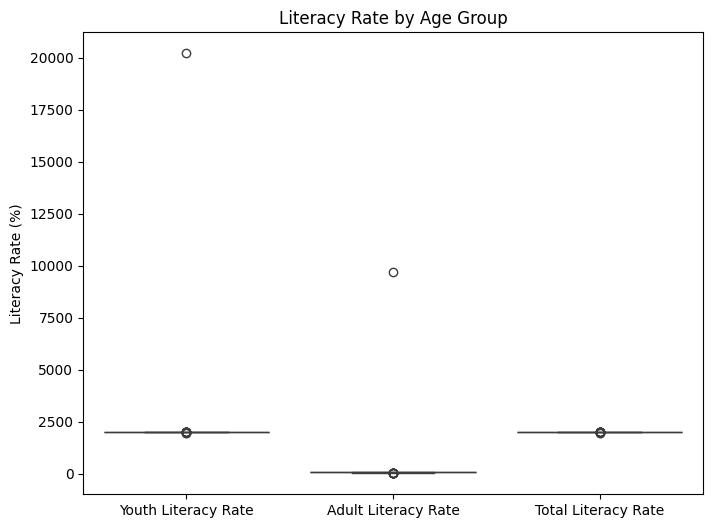

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Youth Literacy Rate', 'Adult Literacy Rate', 'Total Literacy Rate']]) # Replace 'Elderly Literacy Rate' with 'Total Literacy Rate' or other existing column
plt.title('Literacy Rate by Age Group')
plt.ylabel('Literacy Rate (%)')
plt.show()

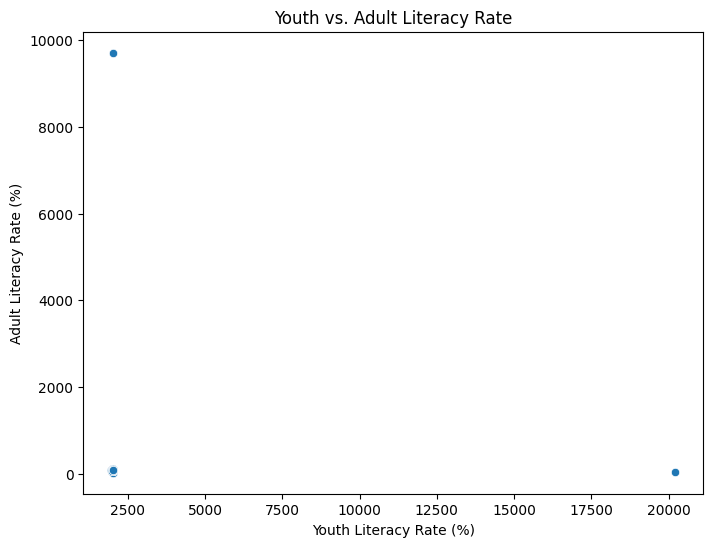

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Youth Literacy Rate', y='Adult Literacy Rate', data=df)
plt.title('Youth vs. Adult Literacy Rate')
plt.xlabel('Youth Literacy Rate (%)')
plt.ylabel('Adult Literacy Rate (%)')
plt.show()

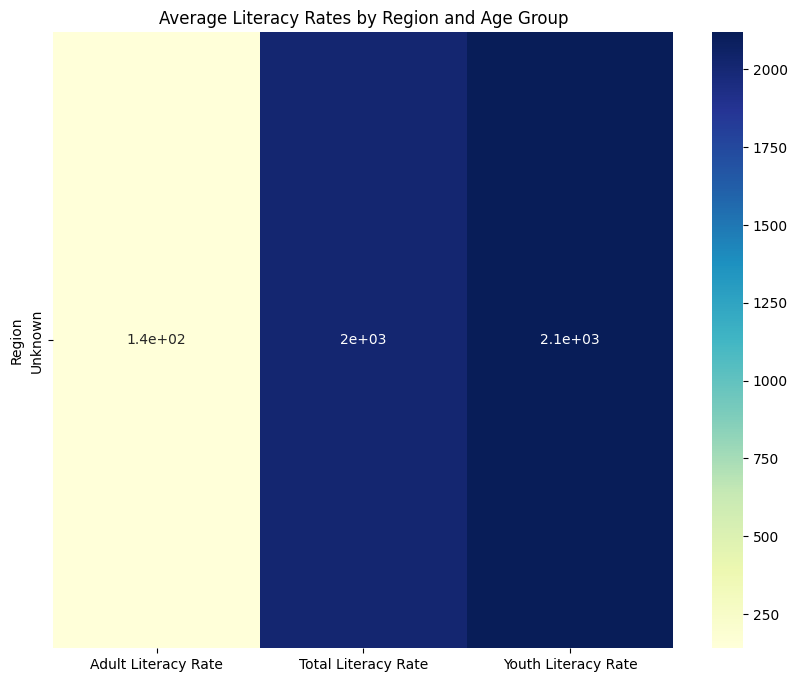

In [57]:
if 'Region' in df.columns:
    plt.figure(figsize=(10, 8))
    region_literacy = df.pivot_table(values=['Youth Literacy Rate', 'Adult Literacy Rate', 'Total Literacy Rate'], index='Region', aggfunc='mean')
    sns.heatmap(region_literacy, annot=True, cmap='YlGnBu')
    plt.title('Average Literacy Rates by Region and Age Group')
    plt.show()
else:
    print("Region column not found in the DataFrame. Cannot create heatmap.")

In [58]:
from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/drive/My Drive/literacy_rates_final.csv', index=False)

plt.savefig('/content/drive/My Drive/literacy_heatmap.png')

Mounted at /content/drive


<Figure size 640x480 with 0 Axes>

In [59]:
from google.colab import files
files.download('literacy_rates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>